### Galáxias barradas e interações 2

Este notebook possui cálculos para melhor caracterizar galáxias barradas interagindo com um satélite (galáxia anã). Os cálculos aqui apresentados são de: força da barra. Algumas funções importadas estão escritas em bar_funcs.py

Andressa Wille, 27/04/2023

Aqui estamos usando:

    - Galáxia sem gás, com 20% de bojo (galáxia não perturbada)
    
    +
    
    - Galáxias anãs satélites
    
com massas $ M = 1 \times 10^{10}\mathrm{{M}_\odot}, M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, M = 0.1 \times 10^{10}\mathrm{{M}_\odot}$ e raios orbitais de $r = 10 \, \mathrm{kpc}, r = 20 \, \mathrm{kpc}, r = 30 \, \mathrm{kpc}$.

In [1]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np
from bar_funcs import *

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

In [3]:
#caminhos
#path_01_10 = 'gb_sat0.1-10/'
#path_01_20 = 'gb_sat0.1-20/'
path_01_30 = 'gb_sat0.1-30/'
#path_05_10 = 'gb_sat0.5-10/'
#path_05_20 = 'gb_sat0.5-20/'
#path_05_30 = 'gb_sat0.5-30/'
path_1_10 = 'gb_sat1-10/'
path_1_20 = 'gb_sat1-20/'
path_1_30 = 'gb_sat1-30/'
paths = [path_01_30, path_1_10, path_1_20, path_1_30]

In [4]:
n_snapshots = 120

In [5]:
#arrays para força da barra
time_01_30 = np.empty(n_snapshots)
A2_01_30 = np.empty(n_snapshots)

time_1_10 = np.empty(n_snapshots)
A2_1_10 = np.empty(n_snapshots)

time_1_20 = np.empty(n_snapshots)
A2_1_20 = np.empty(n_snapshots)

time_1_30 = np.empty(n_snapshots)
A2_1_30 = np.empty(n_snapshots)

In [7]:
#força da barra
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            time_01_30[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 1:
            time_1_10[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 2:
            time_1_20[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 3:
            time_1_30[j] = round(f['Header'].attrs['Time'], 2)

        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)

        #calcular força da barra
        if p == 0:
            A2_01_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)          
        if p == 1:
            A2_1_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 2:
            A2_1_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 3:
            A2_1_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)

In [8]:
#caminhos
path = 'bojo20_200/'
paths = [path]

In [9]:
n_snapshots = 281

In [10]:
#arrays para força da barra
time = np.empty(n_snapshots)
A2 = np.empty(n_snapshots)

In [11]:
#força da barra
for p, path in enumerate(paths):

    for j in range (1, n_snapshots): #alterei o passo inicial para 1 por causa da galáxia com gás
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            time[j] = 0.0 + round(f['Header'].attrs['Time'], 2)

        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)

        #calcular força da barra
        if p == 0:
            A2[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)           

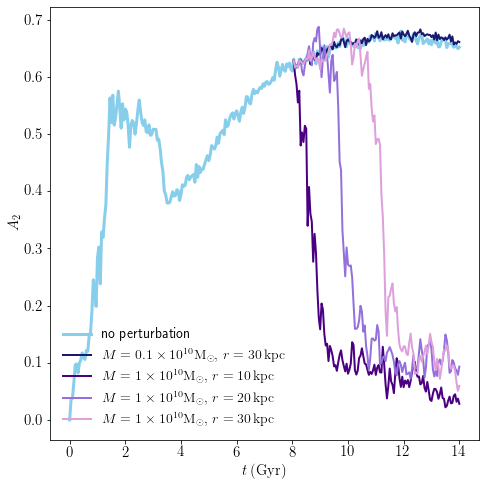

In [26]:
plt.figure(figsize=[7,7])
plt.plot(time, A2, color='skyblue', lw=3, label='no perturbation')
plt.plot(time_01_30, A2_01_30, color='midnightblue', ls = '-',  lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
plt.plot(time_1_10, A2_1_10, color='indigo', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, A2_1_20, color='mediumpurple', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, A2_1_30, color='plum', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$A_2$', fontsize=15)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, fontsize=14)
plt.tight_layout()
plt.savefig('a2_gb+sats.png')

__________________________